## Trigo + Linear 2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(700,) (300,)


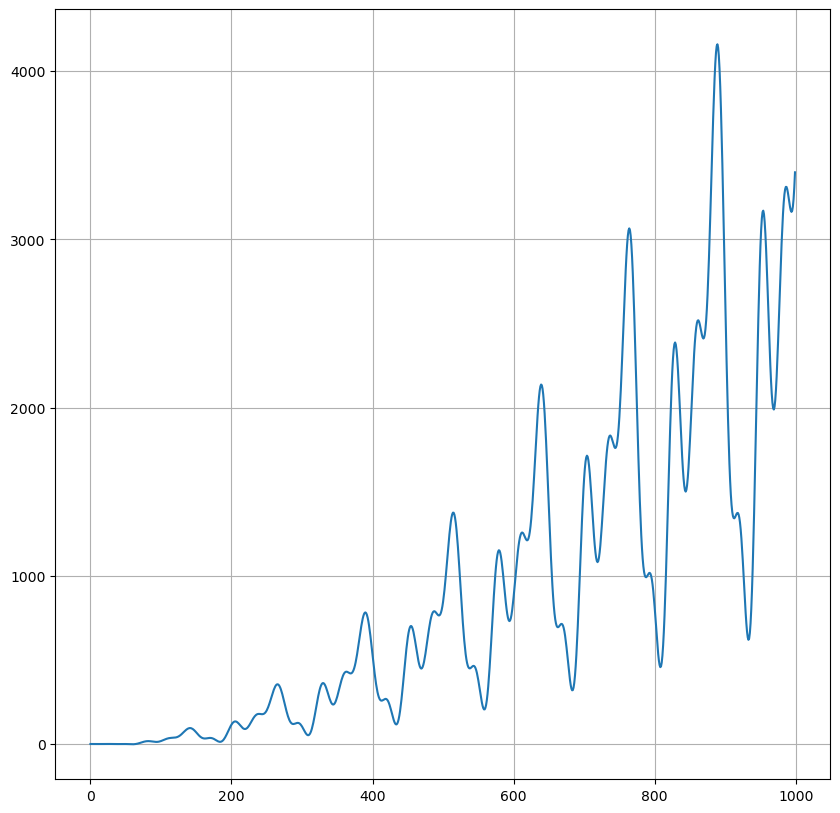

In [1]:
import numpy as np
import pandas as pd
data_name='2(x^2)sin^2(4x)+3(x^2)sin^2(2x+pi/4)+4(x^2)cos^2(x)-3'
def sine_linear(amplitude,frequency,phase,linear,degree,sd,numpoints):
  num_points = numpoints

  # Generate time values from 0 to 2*pi
  t = np.linspace(0, 8*np.pi, num_points)
  curve=0
  
  # Generate sine wave data
  for i in range(len(amplitude)):
    curve=curve+ ( amplitude[i]*(t**degree[i])*(np.sin((frequency[i] * t)+phase[i])**sd[i]))
  for i in range(len(linear)):
    curve=curve+linear[i]*t
  return pd.Series(curve)

amplitude=[2,3,4]
frequency=[4,2,1]
phase=[0,np.pi/4,np.pi/2]
linear=[-3]
degree=[2,2,2]
sd=[2,2,2]
numpoints=1000
sine_wave_series=sine_linear(amplitude,frequency,phase,linear,degree,sd,numpoints)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(sine_wave_series)
plt.grid()


train, test = sine_wave_series[:int(0.7*len(sine_wave_series))], sine_wave_series[int(0.7*len(sine_wave_series)):]
print(train.shape,test.shape)

## Trigo + Linear 1

<Axes: title={'center': 'Combined Trigonometric and Linear Functions'}>

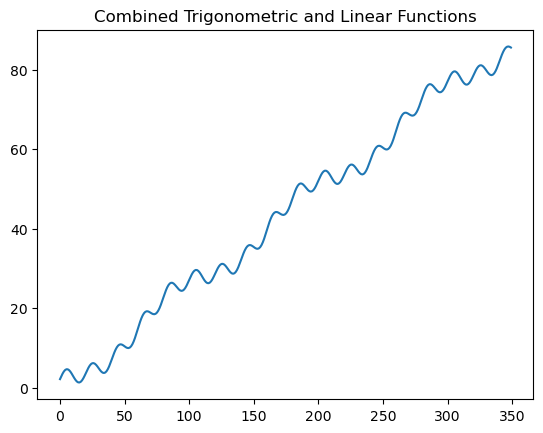

In [2]:
import pandas as pd
import numpy as np

def generate_combined_series(num_points, sine_amplitude=2, cosine_amplitude=3, sine_freq=0.05, cosine_freq=0.01, phase_shift=np.pi/4):
    time_index = np.arange(num_points)
    
    # Generate values for sine and cosine curves
    sine_values = sine_amplitude * np.sin(2 * np.pi * sine_freq * time_index) 
    cosine_values = cosine_amplitude * np.cos(2 * np.pi * cosine_freq * time_index + phase_shift)
    
    # Generate linear values
    linear_values = 0.25 * time_index
    
    # Combine sine, cosine, and linear values
    combined_values = sine_values + cosine_values + linear_values
    
    # Create pandas series
    combined_series = pd.Series(combined_values)
    
    return combined_series

# Number of points for the series
num_points = 500  # Change this as needed

# Generate combined series
combined_series = generate_combined_series(num_points)
train, test = combined_series[:int(0.7*len(combined_series))], combined_series[int(0.7*len(combined_series)):]
train.plot(title="Combined Trigonometric and Linear Functions")

## Sine + Cosine

<Axes: title={'center': 'Combined Sine and Cosine Curves'}>

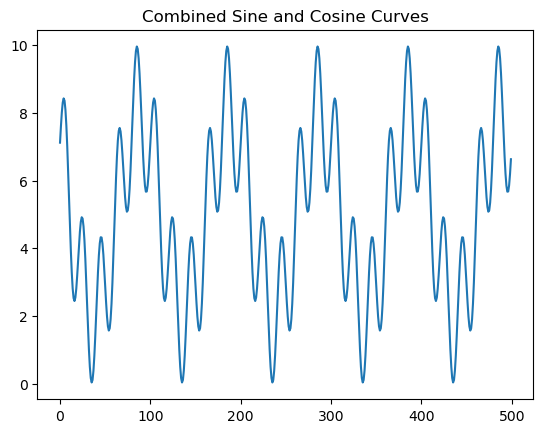

In [8]:
import pandas as pd
import numpy as np

def generate_combined_series(num_points, sine_amplitude=2, cosine_amplitude=3, sine_freq=0.05, cosine_freq=0.01, phase_shift=np.pi/4):
    # Generate values for sine and cosine curves
    time_index = np.arange(num_points)
    sine_values = sine_amplitude * np.sin(2 * np.pi * sine_freq * time_index) 
    cosine_values = cosine_amplitude * np.cos(2 * np.pi * cosine_freq * time_index + phase_shift)

    # Create pandas series combining sine and cosine curves
    combined_values = sine_values + cosine_values
    combined_series = pd.Series(combined_values)

    return combined_series + 5

# Number of points for the series
num_points = 500  # Change this as needed

# Generate combined series
combined_series = generate_combined_series(num_points)

# Plot the combined series
combined_series.plot(title="Combined Sine and Cosine Curves")

## Linear + Noise

((400,), (100,))

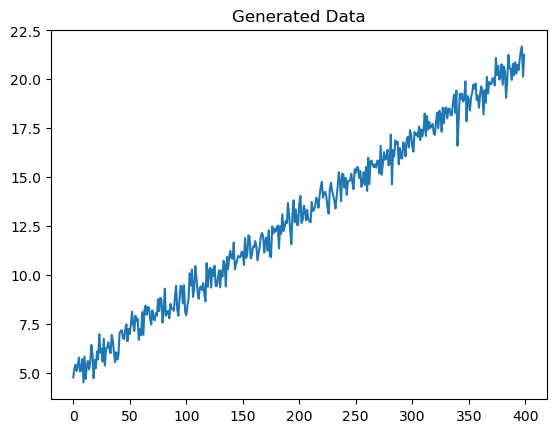

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 500
slope = 2
intercept = 5

# Generate random x values
x_values = np.linspace(0, 10, num_points)

# Generate corresponding y values using a linear equation
y_values = slope * x_values + intercept

# Add some noise to y values
noise = np.random.normal(0, 0.5, num_points)
y_values_with_noise = y_values + noise

# Create pandas Series
data = pd.Series(y_values_with_noise, name='Y')
train, test = data[:int(0.8*len(data))], data[int(0.8*len(data)):]
train.plot(title='Generated Data')
train.shape, test.shape

## Sine

((700,), (300,))

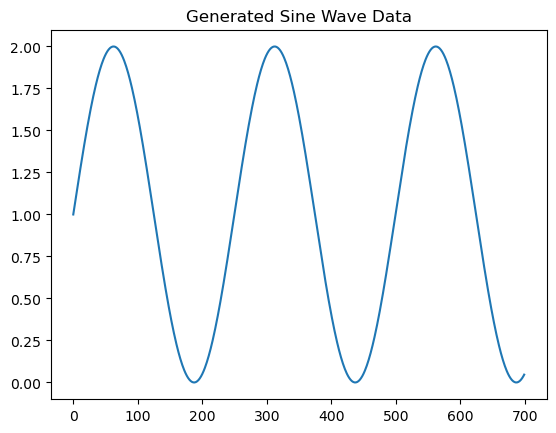

In [6]:
import numpy as np
import pandas as pd

# Number of points
num_points = 1000

# Generate time values from 0 to 2*pi
t = np.linspace(0, 2*np.pi, num_points)

# Generate sine wave data
amplitude = 1  # Amplitude of the sine wave
frequency = 4  # Frequency of the sine wave
sine_wave = amplitude * np.sin(frequency * t) + amplitude

# Create a Pandas Series
sine_wave_series = pd.Series(sine_wave)

# Display the first few points of the series

# Display the Series
train, test = sine_wave_series[:int(0.7*len(sine_wave_series))], sine_wave_series[int(0.7*len(sine_wave_series)):]
train.plot(title='Generated Sine Wave Data')
train.shape, test.shape

## Mauna Loa

(1557,) (668,) (2225,)


/Users/shubhagarwal/anaconda3/envs/nlp/lib/python3.11/site-packages/sklearn/datasets/_arff_parser.py:430: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype)


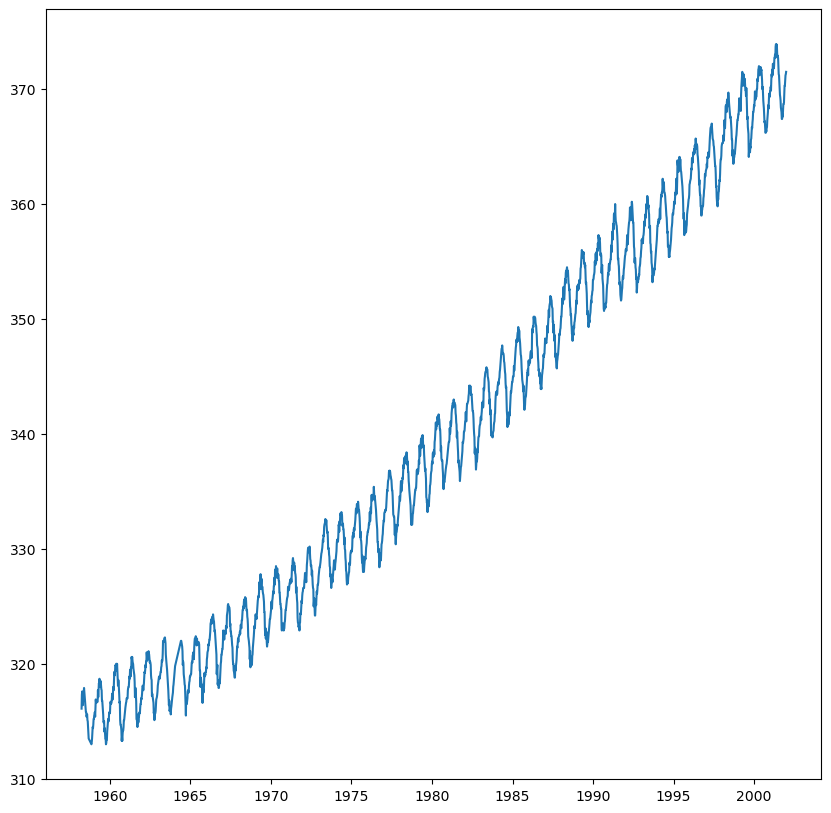

In [7]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True, parser='auto')
co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data.sort_values(by="date")
co2_data = co2_data[["date", "co2"]].set_index("date")

co2_data=co2_data.squeeze()
train, test = co2_data[:int(0.7*len(co2_data))], co2_data[int(0.7*len(co2_data)):]
print(train.shape,test.shape,co2_data.shape)
data_name='MaunaLoaCO2'

plt.figure(figsize=(10,10))
plt.plot(co2_data)